| **Змінна** | **Опис (англійською)**            | **Ключ / Значення**                            |                                   |
| ---------- | --------------------------------- | ---------------------------------------------- | --------------------------------------------------------- |
| `survival` | Survival                          | 0 = No, 1 = Yes                                | Виживання (0 = Ні, 1 = Так)                               |
| `pclass`   | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd                      | Клас квитка (1 = 1-й, 2 = 2-й, 3 = 3-й)                   |
| `sex`      | Sex                               | —                                              | Стать                                                     |
| `age`      | Age in years                      | —                                              | Вік (у роках)                                             |
| `sibsp`    | Number of siblings/spouses aboard | —                                              | Кількість братів/сестер або подружжя на борту             |
| `parch`    | Number of parents/children aboard | —                                              | Кількість батьків або дітей на борту                      |
| `ticket`   | Ticket number                     | —                                              | Номер квитка                                              |
| `fare`     | Passenger fare                    | —                                              | Вартість квитка                                           |
| `cabin`    | Cabin number                      | —                                              | Номер каюти                                               |
| `embarked` | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton | Порт посадки (C = Шербур, Q = Квінстаун, S = Саутгемптон) |


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

plt.style.use('ggplot')
plt.rcParams['axes.titlecolor'] = 'black'


In [119]:
test = pd.read_csv(
    "/Users/vladislavpleshko/Documents/VS Code/before/amazinum/data/test.csv")
train = pd.read_csv(
    "/Users/vladislavpleshko/Documents/VS Code/before/amazinum/data/train.csv")
res = pd.read_csv(
    "/Users/vladislavpleshko/Documents/VS Code/before/amazinum/data/gender_submission.csv")
print(train.shape, test.shape)
train.head()

# for EDA
train['Deck'] = train['Cabin'].str[0]
train['Age'] = train['Age'].replace(np.nan, train['Age'].median())

df = pd.concat([res, test], axis=1, ignore_index=True).drop(columns=[2])
df['Deck'] = df[11].str[0]
df.columns = train.columns.to_list()
df['Age'] = df['Age'].replace(np.nan, df['Age'].median())
df


(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,NaN


In [120]:
dataframe = pd.concat([train, df], axis=0, ignore_index=True)
print(dataframe.shape)
dataframe


(1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,NaN


In [121]:

deck_order = sorted(dataframe['Deck'].dropna().unique().tolist())
pclass_order = sorted(dataframe['Pclass'].dropna().unique().tolist())

# Створення окремих фігур за допомогою Plotly Express
fig_deck = px.histogram(
    data_frame=dataframe,
    x='Deck',
    color='Survived',
    category_orders={'Deck': deck_order},
    barmode='group'
)

fig_pclass = px.histogram(
    data_frame=dataframe,
    x='Pclass',
    color='Survived',
    barmode='group',
    category_orders={'Pclass': pclass_order}
)

fig_survived = px.histogram(
    data_frame=dataframe,
    x='Survived',
    color='Survived'
)

fig_gender = px.histogram(
    data_frame=dataframe,
    x='Survived',
    color='Pclass',
    facet_col='Sex',
    barmode='overlay',
    category_orders={'Pclass': [1,2,3],},
    labels={'Pclass': 'Pclass','Sex':'Sex' , 'Survived': 'Survived'}
)

# Створення полотна з трьома підграфіками (3 рядки, 1 колонка)
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        'Relationship between "Deck" and "Survived"',
        'Relationship between "PClass" and "Survived"',
        'Passenger distribution by survival status',
        'Relationship between "Sex, Pclass" and "Survived"'
    )
)

# Додавання traces з кожної фігури до відповідного підграфіка
for trace in fig_deck.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_pclass.data:
    fig.add_trace(trace, row=1, col=2)

for trace in fig_survived.data:
    fig.add_trace(trace, row=2, col=1)

for trace in fig_gender.data:
    fig.add_trace(trace, row=2, col=2)

# Оновлення макету фігури
fig.update_layout(
    height=600,
    width=1400,
    title_text='Merged visualisations: Deck, Pclass та Survived',
    showlegend=True
)
fig.update_xaxes(
    title_text='Category of Deck (based on "Cabin")', row=1, col=1)
fig.update_xaxes(title_text='Passenger Class', row=1, col=2)
fig.update_xaxes(title_text='Survival status', row=2, col=1)
fig.update_xaxes(title_text='Passanger class & sex / survived', row=2, col=2)

# Відображення фігури
fig.show()


<p align="center">
  <img src="https://titanicll.co.uk/wp-content/uploads/2020/07/2020-07-06-1.png" alt="rms titanic" width="550"/>
</p>


In [122]:

le = LabelEncoder()
dataframe['Sex'] = le.fit_transform(dataframe['Sex'])
dataframe['Embarked'] = le.fit_transform(dataframe['Embarked'])
dataframe


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,2,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,NaN
1307,1308,0,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,2,NaN


In [123]:
# prepare data for model
dataframe = dataframe.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Deck'])

x = dataframe.drop(columns=['Survived'])
y = dataframe['Survived']

x.shape, y.shape


((1309, 7), (1309,))

In [124]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y)

for name, arr in zip(['x_train', 'x_test', 'y_train', 'y_test'], [x_train, x_test, y_train, y_test]):
    print(f'{name}: {arr.shape}')

x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].mean()) # не зрозумілим чином після спліту з'являється 1-н елемент nan


x_train: (981, 7)
x_test: (328, 7)
y_train: (981,)
y_test: (328,)


In [137]:
def plot_roc_curve_ax(ax, fpr, tpr, label=None):
    """
    Малює ROC-криву на заданій осі ax за масивами fpr та tpr.
    """
    ax.plot(fpr, tpr, linewidth=2, label=label or "ROC Curve")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance level")
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_title("ROC Curve")
    ax.grid(True)
    ax.legend(loc="lower right",edgecolor='black', facecolor='black')


def run_classifier(
    clf, param_grid, x_train, x_test, y_train, y_test, scoring, feature_importance_plot, roc_plot
):
    """
    Навчає класифікатор, виводить метрики та малює три графіка в одному ряду:
    1. Feature Importances
    2. Permutation Importances
    3. ROC Curve
    """
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", clf)
    ])
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=-1,
        scoring=scoring
    )
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)

    print(f"\n=== {best_model.named_steps['clf'].__class__.__name__} ===")
    print("Train score:", round(best_model.score(x_train, y_train), 4))
    print("Test score:", round(best_model.score(x_test, y_test), 4))
    print("ROC_AUC Score:", round(roc_auc_score(y_test, y_pred), 4))
    print("Best params:", grid.best_params_)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Підготовка осей для трьох графіків в одному ряду
    if feature_importance_plot or roc_plot:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # 1) Feature Importances
        if feature_importance_plot == True:
            importances = best_model.named_steps['clf'].feature_importances_
            fi_df = pd.DataFrame({
                'Feature': x_train.columns,
                'Importance': importances
            }).sort_values(by='Importance', ascending=True)
            axes[0].barh(fi_df['Feature'], fi_df['Importance'])
            axes[0].set_title('Feature Importances')
            axes[0].set_xlabel('Importance')

            # 2) Permutation Importances
            perm = permutation_importance(
                best_model, x_test, y_test, n_repeats=10, n_jobs=-1
            )
            pi_df = pd.DataFrame({
                'Feature': x_test.columns,
                'Importance': perm.importances_mean
            }).sort_values(by='Importance', ascending=True)
            axes[1].barh(pi_df['Feature'], pi_df['Importance'])
            axes[1].set_title('Feature (permutation) Importances')
            axes[1].set_xlabel('Importance')
        else:
            axes[0].axis('off')
            axes[1].axis('off')

        # 3) ROC Curve
        if roc_plot == True:
            try:
                y_scores = best_model.predict_proba(x_test)[:, 1]
            except AttributeError:
                y_scores = best_model.decision_function(x_test)
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            plot_roc_curve_ax(axes[2], fpr, tpr, label=best_model.named_steps['clf'].__class__.__name__,)
        else:
            axes[2].axis('off')

        plt.tight_layout()
        plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== RandomForestClassifier ===
Train score: 0.9144
Test score: 0.8628
ROC_AUC Score: 0.8359
Best params: {'clf__max_depth': 10, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}
Confusion Matrix:
 [[193  11]
 [ 34  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       204
           1       0.89      0.73      0.80       124

    accuracy                           0.86       328
   macro avg       0.87      0.84      0.85       328
weighted avg       0.87      0.86      0.86       328



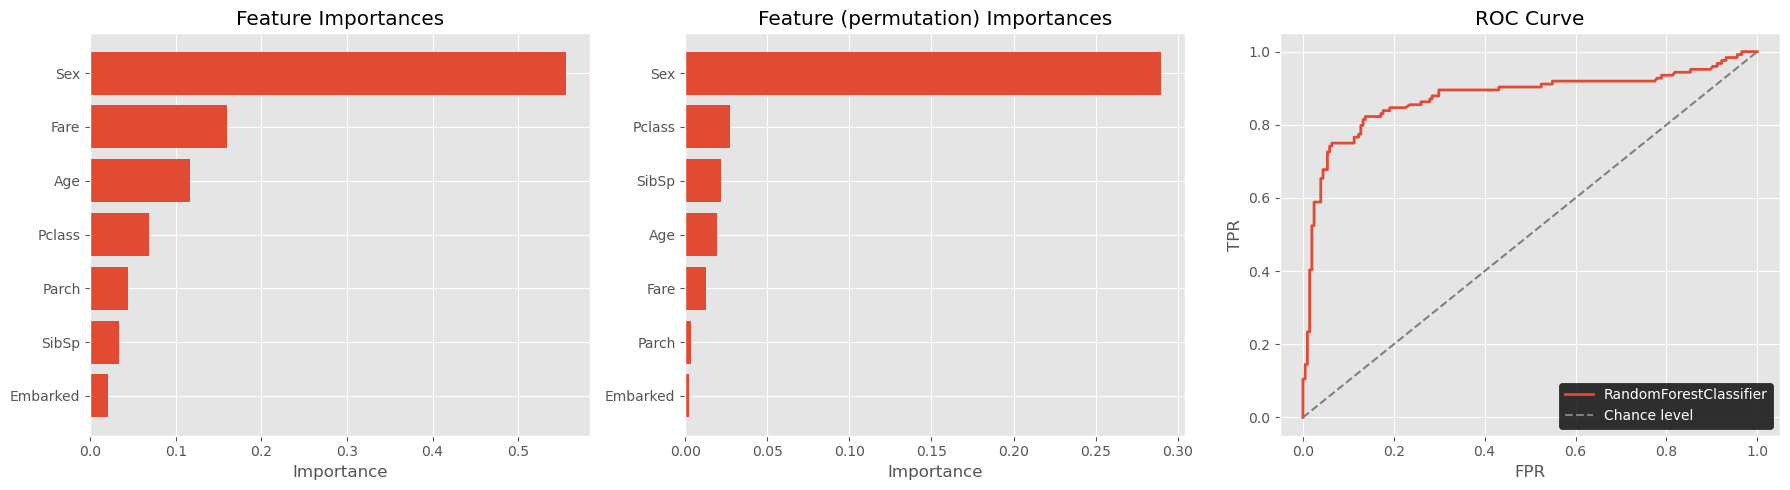

In [138]:
run_classifier(
    clf=RandomForestClassifier(),
    param_grid={
        "clf__n_estimators": [100, 200, 300],
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
    },
    x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, scoring='precision', feature_importance_plot=True, roc_plot=True
)


Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== GradientBoostingClassifier ===
Train score: 0.9266
Test score: 0.8445
ROC_AUC Score: 0.8149
Best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 100}
Confusion Matrix:
 [[191  13]
 [ 38  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       204
           1       0.87      0.69      0.77       124

    accuracy                           0.84       328
   macro avg       0.85      0.81      0.83       328
weighted avg       0.85      0.84      0.84       328



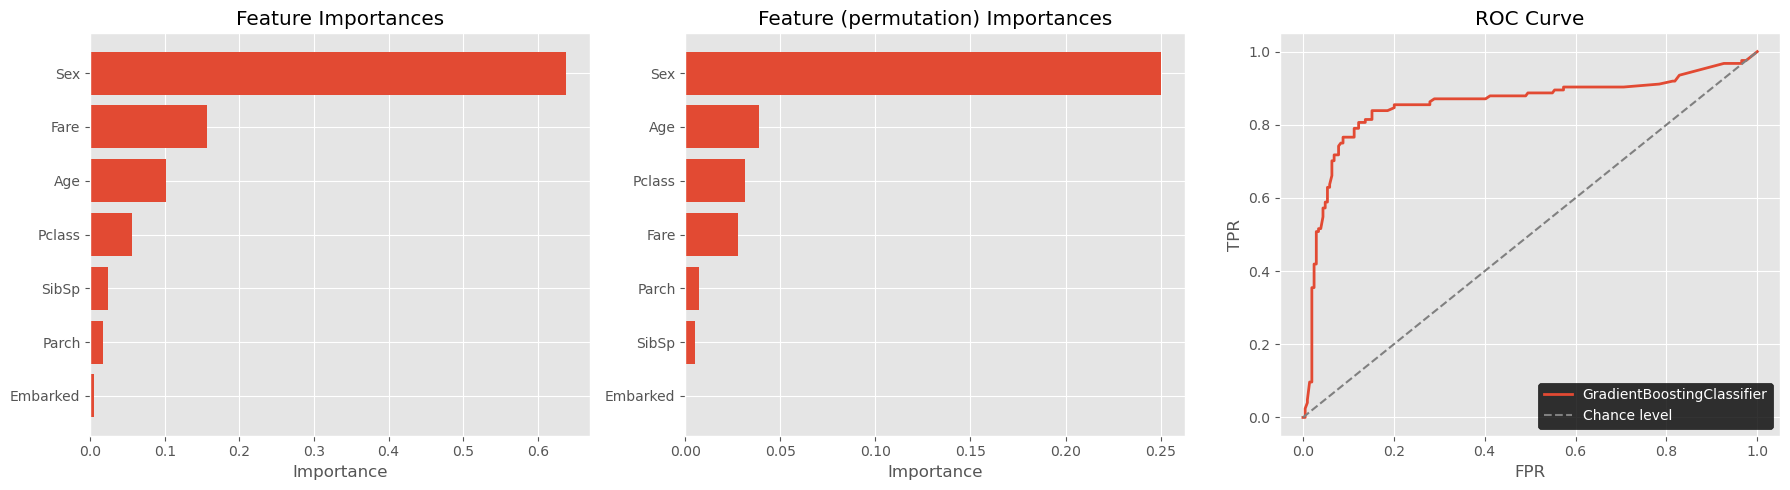

In [139]:
run_classifier(
    clf= GradientBoostingClassifier(),
    param_grid={
        "clf__n_estimators": [100, 200],
        "clf__learning_rate": [0.01, 0.1, 0.2],
        "clf__max_depth": [3, 5, 7]},
        x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
        scoring='precision', feature_importance_plot=True, roc_plot=True
)


Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== XGBClassifier ===
Train score: 0.9235
Test score: 0.8415
ROC_AUC Score: 0.8156
Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__tree_method': 'auto'}
Confusion Matrix:
 [[188  16]
 [ 36  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       204
           1       0.85      0.71      0.77       124

    accuracy                           0.84       328
   macro avg       0.84      0.82      0.83       328
weighted avg       0.84      0.84      0.84       328



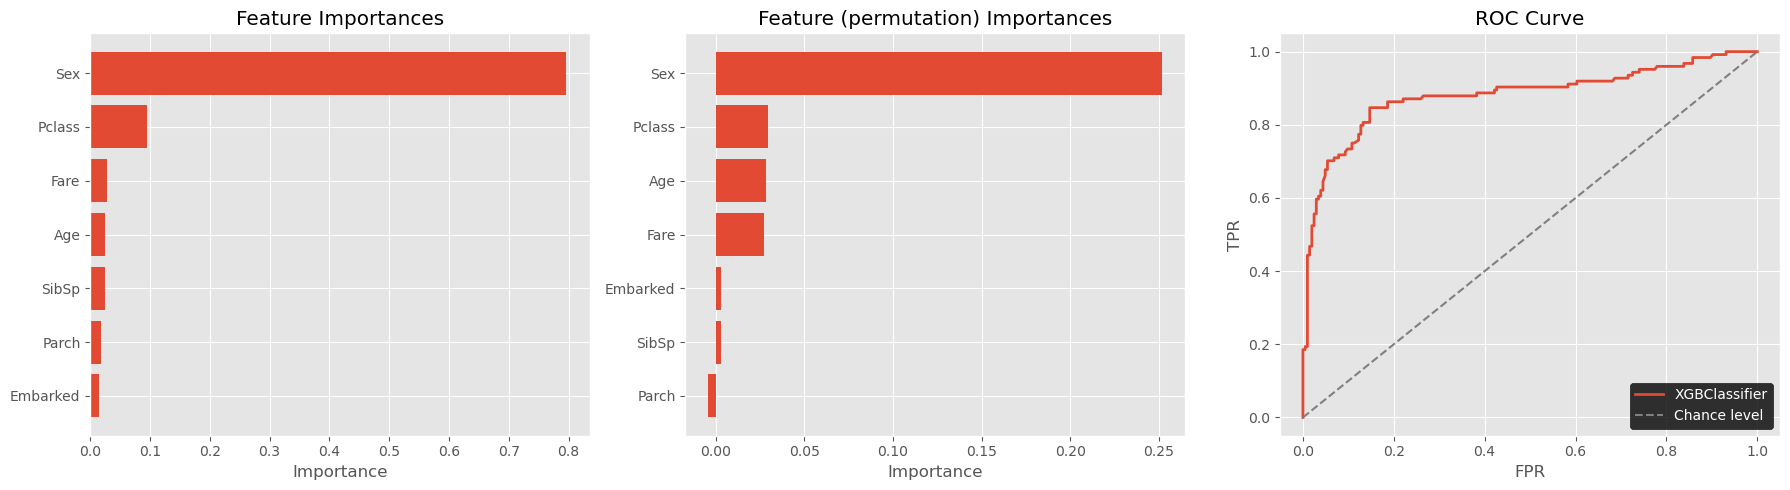

In [ ]:
run_classifier(
    clf=XGBClassifier(),
    param_grid={
        'clf__learning_rate': [0.1, 0.2, 0.3],
        'clf__max_depth': [3,4,5,6],
        'clf__tree_method': ['auto']
    },x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, scoring='roc_auc', feature_importance_plot=True, roc_plot=True
)


Висновок: Random Forest найкраще збалансувала навчання та узагальнення: її розрив між Train (0.9144) і Test (0.8628) найменший, а ROC AUC = 0.8359 — найвищий серед трьох моделей